### Comparison

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
n = 1000
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)

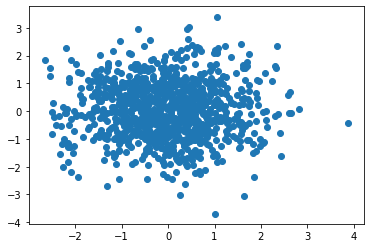

In [4]:
# matplotlib

plt.scatter(x, y);

In [5]:
# altair

df = pd.DataFrame({
    'x': x,
    'y': y
})

In [6]:
import altair as alt

alt.Chart(df).encode(x='x', y='y').mark_circle()

alt.Chart(...)

### Main Marks 

#### 1. Bar

In [7]:
packages = pd.DataFrame({
    'downloads': [8000, 3000, 9000, 4000],
    'package': ['gazpacho', 'gif', 'mummify', 'mark']
})

alt.Chart(packages).mark_bar().encode(
    x='package',
    y='downloads'
)

alt.Chart(...)

In [8]:
alt.Chart(packages).mark_bar().encode(
    y='package',
    x='downloads'
)

alt.Chart(...)

#### 2. Line

In [9]:
marathon = pd.read_csv('../data/marathon.csv')
marathon['time'] = marathon['time'].apply(pd.to_datetime)
rich = marathon[marathon['runner'] == 'Rich H.']

In [10]:
rich.head()

,time,distance,runner,dsplit,mph,hour
376,2019-03-24 18:00:00,0.000000,Rich H.,10.430340,5.215170,0
377,2019-03-24 20:00:00,10.430340,Rich H.,10.430340,5.215170,2
378,2019-03-24 22:00:00,20.860680,Rich H.,7.822755,3.911377,4
379,2019-03-24 23:59:00,28.683435,Rich H.,7.822755,3.911377,6
380,2019-03-25 02:00:00,36.506190,Rich H.,7.822755,3.911377,8


In [11]:
alt.Chart(rich).mark_line().encode(
    x='time',
    y='distance'
)

alt.Chart(...)

#### 3. Circle

Encoding Data Types


| Data Type    | Shorthand Code | Description                       |
| ------------ | -------------- | --------------------------------- |
| quantitative | `Q`            | a continuous real-valued quantity |
| ordinal      | `O`            | a discrete ordered quantity       |
| nominal      | `N`            | a discrete unordered category     |
| temporal     | `T`            | a time or date value              |
| geojson      | `G`            | a geographic shape                |


In [12]:
# a boring, but important example dataset

from vega_datasets import data

cars = data.cars()

alt.Chart(cars).mark_circle(size=60).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N',
)

alt.Chart(...)

In [13]:
# more exciting data 🍸

cocktails = pd.read_csv('../data/cocktails.tsv', delimiter='\t')

In [14]:
cocktails.sample(3)

,name,abv,acid,sugar,type,index,instructions,ingredients,ncotw
28,Negroni,20.7,0.14,9.4,stirred,33,Stir. Coupe or over a large rock. Orange or gr...,1 oz sweet vermouth<br/>1 oz gin (47.3% abv)<b...,"<a href=""https://www.reddit.com/r/cocktails/co..."
19,Margarita,18.5,0.76,6.0,shaken,24,"Shake, coupe (optionally salted rim).",2 oz blanco tequila (40% abv)<br/>3/4 oz lime ...,not yet
16,Fresh Lime Gimlet,17.3,0.82,8.7,shaken,21,"Shake, coupe. Garnish with lime wheel.",2 oz gin (47.4% abv)<br/>3/4 oz lime juice<br/...,"<a href=""https://www.reddit.com/r/cocktails/co..."


In [15]:
alt.Chart(cocktails).mark_circle(size=100).encode(
    x='acid',
    y='sugar',
    color='type',
)

alt.Chart(...)

### Bonus Marks

#### B1. Tick

In [16]:
alt.Chart(cocktails).mark_tick().encode(
    x='abv',
    y='type'
)

alt.Chart(...)

#### B2. Heatmap

In [17]:
# boring example data

x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2

boring = pd.DataFrame({
    'x': x.ravel(),
    'y': y.ravel(),
    'z': z.ravel()
})

In [18]:
boring.sample(5)

,x,y,z
86,1,3,10
74,-1,2,5
17,2,-4,20
94,-1,4,17
67,2,1,5


In [19]:
alt.Chart(boring).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)

alt.Chart(...)

In [20]:
# more exciting data 🦉

owl = pd.read_csv('../data/owl.csv')

In [21]:
owl.sample(5)

,X,Y,Colour
85,8,9,Brown
81,8,5,Brown
62,6,8,Dark Brown
55,6,1,Brown
83,8,7,White


In [22]:
alt.Chart(owl).mark_rect().encode(
    x='X:O',
    y='Y:O',
    color='Colour:N'
)

alt.Chart(...)

#### B4. Area

In [23]:
dads = marathon[marathon['runner'].isin(['Brian F.', 'Rich H.'])]

In [24]:
dads.sample(5)

,time,distance,runner,dsplit,mph,hour
389,2019-03-25 20:00:00,80.835135,Rich H.,2.607585,1.303792,26
9,2019-03-25 12:01:00,57.366870,Brian F.,5.215170,2.607585,18
13,2019-03-25 16:00:00,67.797210,Brian F.,5.215170,2.607585,22
0,2019-03-24 18:00:00,0.000000,Brian F.,7.822755,3.911377,0
20,2019-03-26 10:00:00,91.265475,Brian F.,5.215170,2.607585,40


In [25]:
alt.Chart(dads).mark_area(opacity=3/4).encode(
    x="hour",
    y="distance",
    color="runner:N"
)

alt.Chart(...)

#### B5. Histogram

In [26]:
# boring IMBD data 

df = data.movies.url

alt.Chart(df).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [27]:
finish = marathon[marathon.hour == 48]

In [28]:
alt.Chart(finish).mark_bar().encode(
    x=alt.X("distance:Q", bin=True),
    y='count()',
)

alt.Chart(...)